<a href="https://colab.research.google.com/github/Team-Coders-5-O/Smart-compost-bin/blob/machine-learning/final_soil_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!nvidia-smi

Thu Apr 21 07:55:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    30W /  70W |   1774MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount("/content/drive/",force_remount=True)

Mounted at /content/drive/


In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Get Data From Google Drive
train_dir ="/content/drive/MyDrive/GoogleColab_Notebooks/Soil_Images/Train"
test_dir="/content/drive/MyDrive/GoogleColab_Notebooks/Soil_Images/Test"

In [ ]:
# Count of Images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) 
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

4 Classes
594 Train images
112 Test images


In [ ]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2, #Shear angle in counter-clockwise direction in degrees
                                   zoom_range=0.2, #Range for random zoom
                                   validation_split=0.2, # validation split 20%. fraction of data to reserve for validation.
                                   horizontal_flip=True)# Randomly flip inputs horizontally.
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 594 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'Dry': 0, 'Fertile': 1, 'Incomplete': 2, 'Wet': 3}

In [ ]:
# CNN building.
model = Sequential()
# First Convlutional Layer.
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
# Second Convlutional Layer.
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Third Convlutional Layer.
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  
# Flattening.
model.add(Flatten())
# Fuly Connected Layer.
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


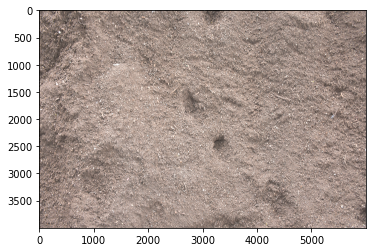

In [ ]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/GoogleColab_Notebooks/Soil_Images/Train/Dry/GMJ_5047.JPG')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/MyDrive/GoogleColab_Notebooks/Soil_Images/Train/Dry/GMJ_5047.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
# Visualizing output after every layer.
from keras.models import Model
#First Convlutional Layer
conv2d_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
#Second Convlutional Layer
conv2d_1_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
#Third Convlutional Layer
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
#Flatten
flatten_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_features = conv2d_output.predict(img)
max_pooling2d_features = max_pooling2d_output.predict(img)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
flatten_1_features = flatten_output.predict(img)

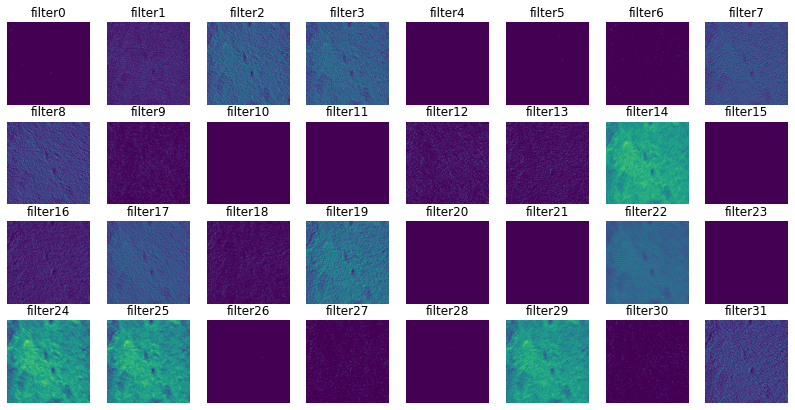

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

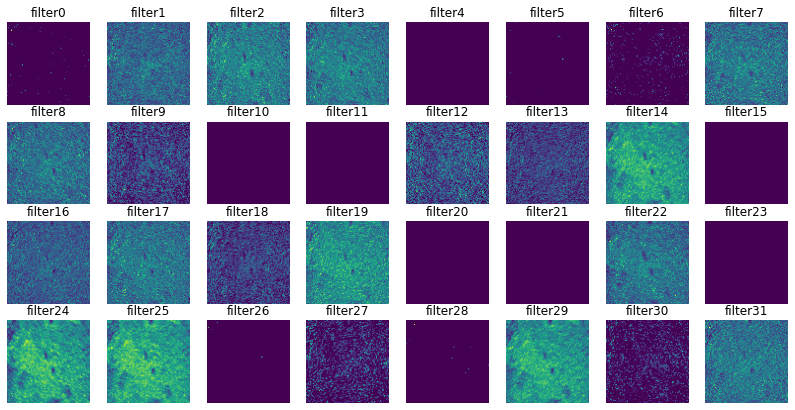

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_features[0, :, :, i], cmap='viridis')
plt.show()

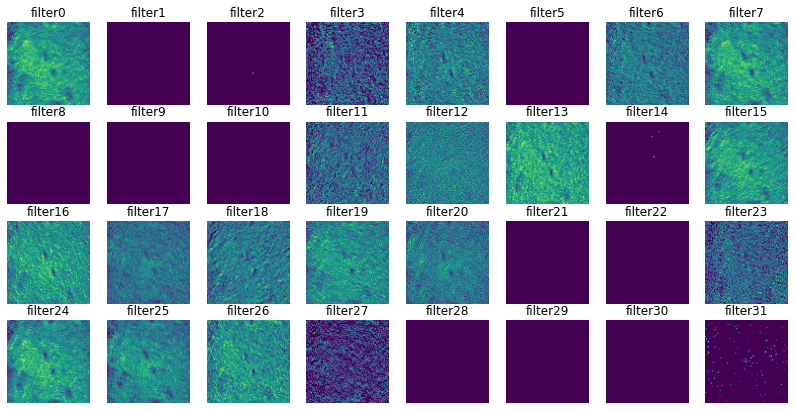

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

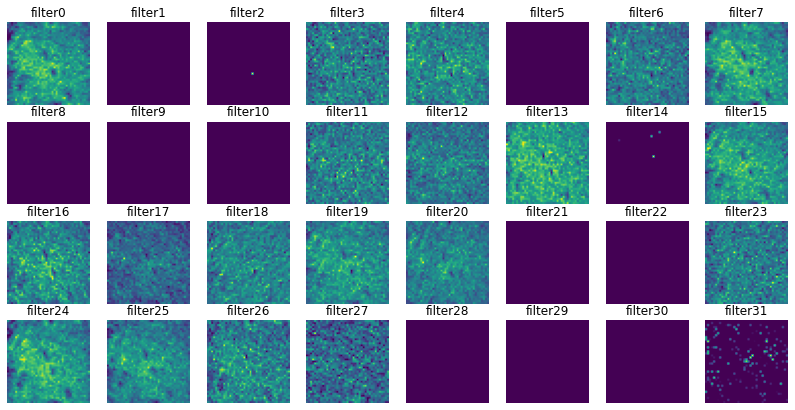

In [ ]:
#visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis') 
plt.show()

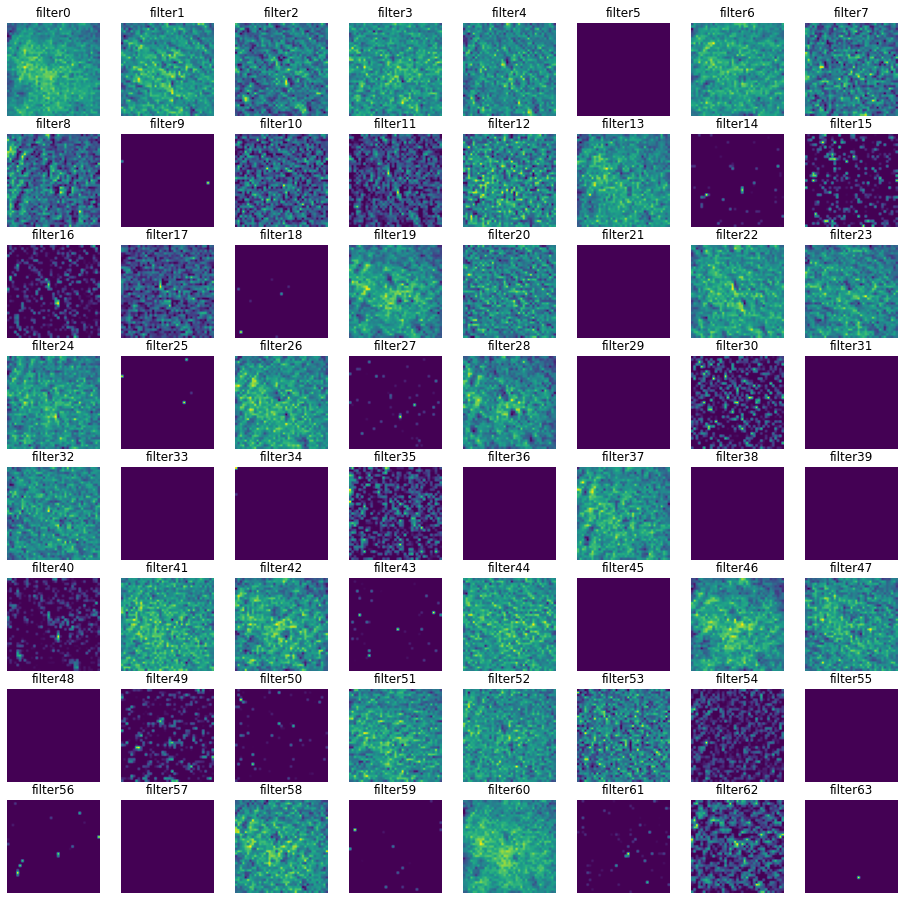

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

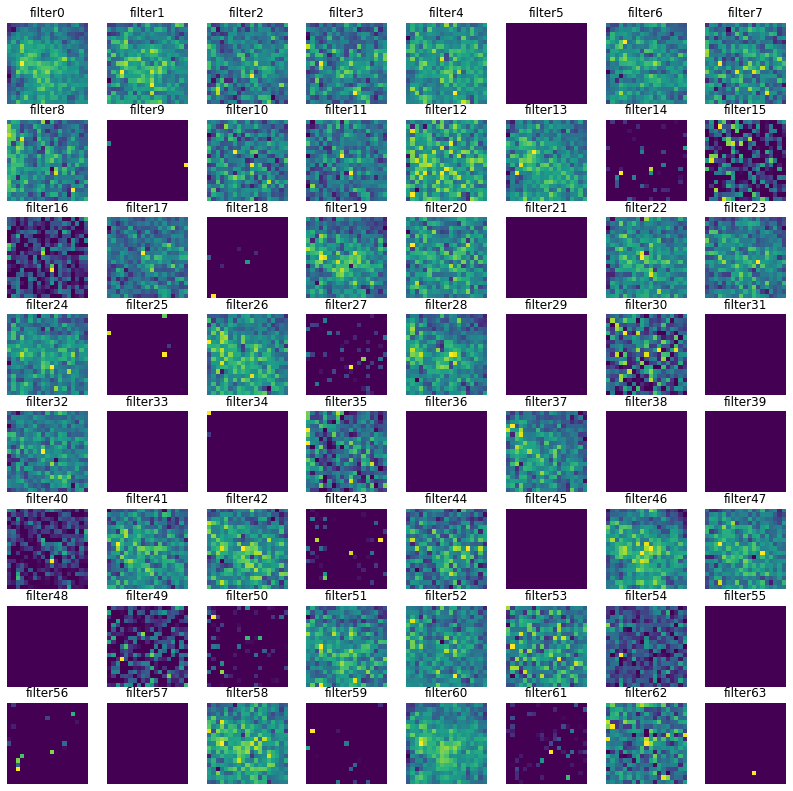

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i],cmap='viridis')
plt.show()


In [ ]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 594 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Model building to get trained with parameters.
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

train=model.fit_generator(train_generator,
                        epochs=20,
                          steps_per_epoch=train_generator.samples //  batch_size,
                          validation_data = test_generator,
                          verbose=1
                          )

Epoch 1/20
18/18 [==============================] - 484s 28s/step - loss: 1.1734 - accuracy: 0.5178 - val_loss: 1.3510 - val_accuracy: 0.3393
Epoch 2/20
18/18 [==============================] - 228s 13s/step - loss: 1.0046 - accuracy: 0.5451 - val_loss: 1.2989 - val_accuracy: 0.4196
Epoch 3/20
18/18 [==============================] - 228s 13s/step - loss: 0.8719 - accuracy: 0.6459 - val_loss: 0.6647 - val_accuracy: 0.7321
Epoch 4/20
18/18 [==============================] - 228s 13s/step - loss: 0.6561 - accuracy: 0.7171 - val_loss: 0.6592 - val_accuracy: 0.8571
Epoch 5/20
18/18 [==============================] - 227s 13s/step - loss: 0.6004 - accuracy: 0.7420 - val_loss: 0.6956 - val_accuracy: 0.8125
Epoch 6/20
18/18 [==============================] - 226s 13s/step - loss: 0.4704 - accuracy: 0.8238 - val_loss: 0.7239 - val_accuracy: 0.7946
Epoch 7/20
18/18 [==============================] - 227s 13s/step - loss: 0.4122 - accuracy: 0.8363 - val_loss: 0.4999 - val_accuracy: 0.8839
Epoch 

In [ ]:
print("The validation accuracy is : ", train.history['val_accuracy'][-1] )
print("The training accuracy is : ", train.history['accuracy'][-1] )
print("The validation loss is : ", train.history['val_loss'][-1] )
print("The training loss is : ", train.history['loss'][-1] )

The validation accuracy is :  0.9017857313156128
The training accuracy is :  0.9661921858787537
The validation loss is :  0.8962278366088867
The training loss is :  0.08414986729621887


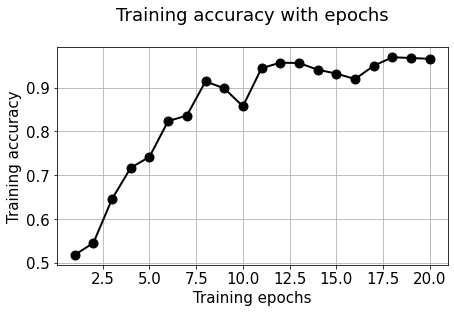

In [ ]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(20)],train.history['accuracy'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

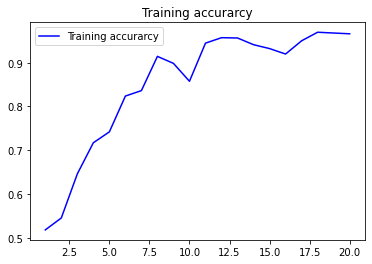

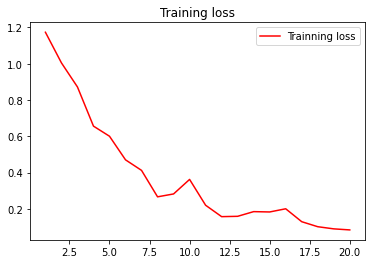

In [ ]:
acc = train.history['accuracy']

loss = train.history['loss']

epochs = range(1, len(acc) + 1)
#Train accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')

plt.title('Training accurarcy')
plt.legend()

plt.figure()
#Train loss

plt.plot(epochs, loss, 'r', label='Trainning loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('/content/drive/MyDrive/GoogleColab_Notebooks/new_model/Soil_Model_v2.h5')

In [ ]:
# Save model weights.
from keras.models import load_model
model.save_weights('/content/drive/MyDrive/GoogleColab_Notebooks/new_model/Soil_Type_weights_v2.h5')

In [ ]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes

In [ ]:
# Loading model and predict.
from keras.models import load_model
model=load_model('/content/drive/MyDrive/GoogleColab_Notebooks/Soil_Model.h5')

Classes = ["Dry","Fertile","Incomplete","Wet"]

Incomplete


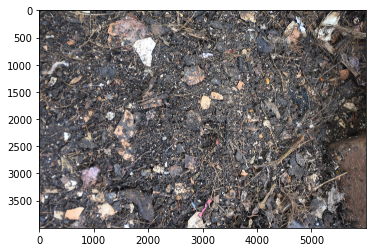

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = np.argmax(model.predict([prepare('/content/drive/MyDrive/GoogleColab_Notebooks/Soil_Images/Train/Incomplete/GMJ_5133.JPG')]))
disease=image.load_img('/content/drive/MyDrive/GoogleColab_Notebooks/Soil_Images/Train/Incomplete/GMJ_5133.JPG')
plt.imshow(disease)
print (Classes[int(result)])